In [32]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [33]:
# Dataframe
path_df = "/home/sakthy1497/Documents/Comment_Analysis/Sentiment-Analysis-for-Comments/Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "/home/sakthy1497/Documents/Comment_Analysis/Sentiment-Analysis-for-Comments/Pickles/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "/home/sakthy1497/Documents/Comment_Analysis/Sentiment-Analysis-for-Comments/Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "/home/sakthy1497/Documents/Comment_Analysis/Sentiment-Analysis-for-Comments/Pickles/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "/home/sakthy1497/Documents/Comment_Analysis/Sentiment-Analysis-for-Comments/Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

Let's check the dimension of our feature vectors:

In [34]:
print(features_train.shape)
print(features_test.shape)

(1700, 181)
(300, 181)


## Model fit and performance
Now, we can fit the model to our training data:

In [35]:
mnbc = MultinomialNB()
mnbc

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
type(labels_train)
labels_training = np.array(labels_train)
type(labels_training)

numpy.ndarray

In [37]:
mnbc.fit(features_train, labels_training)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
mnbc_pred = mnbc.predict(features_test)

For performance analysis, we will use the confusion matrix, the classification report and the accuracy on both training and test data:

#### Training accuracy

In [39]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, mnbc.predict(features_train)))

The training accuracy is: 
0.6905882352941176


#### Test accuracy

In [41]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, mnbc_pred))

The test accuracy is: 
0.6866666666666666


#### Classification report

In [43]:
# Classification report
print("Classification report")
print(classification_report(labels_test,mnbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       157
           1       0.68      0.64      0.66       120
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         6

   micro avg       0.69      0.69      0.69       300
   macro avg       0.34      0.37      0.35       300
weighted avg       0.63      0.69      0.66       300



/home/sakthy1497/anaconda3/envs/intent_classification/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Confusion matrix

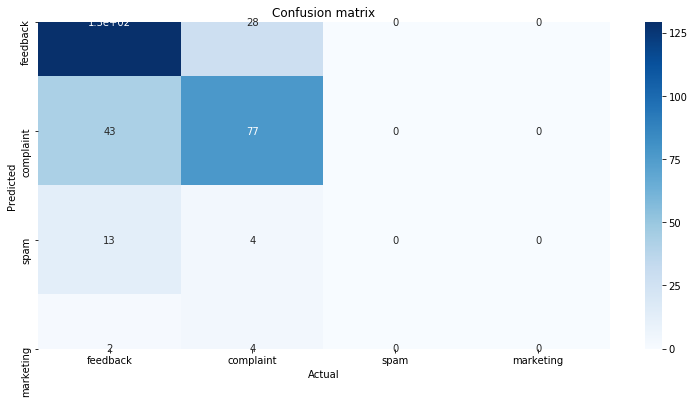

In [48]:
aux_df = df[['Intent', 'Intent_Codes']].drop_duplicates().sort_values('Intent_Codes')
conf_matrix = confusion_matrix(labels_test, mnbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Intent'].values, 
            yticklabels=aux_df['Intent'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()